# Lead Scoring Case Study

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30% which is very poor rate.
### Business Goal:
Our job is to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


### Reading and Understanding the Data
#### Importing Libraries and Extracting Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the required libraries

import numpy as np
import pandas as pd

# visulaisation
import matplotlib.pyplot as plt
import seaborn as sns

# This library will be required to split the data set into train and test sets respectively.

from sklearn.model_selection import train_test_split

# This will be required to scale the data.

from sklearn.preprocessing import MinMaxScaler

# Importing STATS MODEL

import statsmodels.api as sm

# Import VIF module

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Importing Confusion matrix, Precision,recall score & ROC curve

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
# Importing/Loading the Lead data set 

df = pd.read_csv("Leads.csv")

#### Inspecting the dataframe
This helps to give a good idea of the dataframe

In [3]:
# To view first 5 rows of the dataset 

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# To view the no. of rows and columns in the dataset

df.shape

(9240, 37)

In [5]:
# This will return details of dataframe including data types and null values of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Represents range of the dataframe

df.index

RangeIndex(start=0, stop=9240, step=1)

In [7]:
# Checking for missing values

round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

In [8]:
# This provides summary about numeric columns

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
#checking duplicates

sum(df.duplicated(subset = 'Prospect ID'))

0

#### No duplicate values

In [10]:
# To view/display all the columns in the dataset 

pd.set_option('display.max_columns',100)
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


### Data Cleaning

- As we can observe that there are "Select" values for many column.
- This is because customer did not select any option from the list, hence it shows select.
- Select values are as good as NULL.

#### Replace Select with NAN

In [11]:
# Converting 'Select' values to NaN

df = df.replace('Select', np.nan)

In [12]:
# Checking if 'Select' values are converted to NaN

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Handling missing values¶
we will identify the % of missing values for each feild

- Drop those fields with more than 45% missing values
- Drop the records if the missing % value is lesser than 2%
- Replacing the NaN values with most occuring values
- If there is no obvious most occuring value then simply replace NaN with "Others"

In [13]:
# Checking the percentage of missing values again

round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [14]:
# Dropping columns which reflects missing values > 45%

High_null_vars = ['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score',]

df.drop(High_null_vars, axis=1, inplace=True)

In [15]:
# Rechecking missing values

round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

In [16]:
# To display all existing columns in the dataframe

df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [17]:
# Deleting the column'Prospect ID' as it will not have any effect in predicting model

df.drop('Prospect ID', axis=1, inplace=True)

In [18]:
# Listing all categorical variables in to Object_Vars

object_vars = ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [19]:
# Checking details of Object variable columns

df[object_vars].head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [20]:
# To familiarize all the categorical variable columns

for i in object_vars:
    print(i)
    print(df[i].value_counts(normalize=True))
    print("  ")

Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
  
Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
welearnblog_Home     0.000109
NC_EDM               0.000109
youtubechannel       0.000109
testone              0.000109
WeLearn              0.000109
Pay per Click Ads    0.000109
blog                 0.000109
Name: Lead Source, dtype: float64
  
Do Not Email
No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64
  
Do Not Ca

In [21]:
# Identified highly skewed unique categorical columns

unique_vars = ['Do Not Email','Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [22]:
# Dropping unique categorical columns identified

df.drop(unique_vars, axis=1, inplace=True)

In [23]:
# Checking shape of dataframe post dropping unique categorical columns

df.shape

(9240, 15)

In [24]:
# Checking details of dataframe post dropping unique categorical columns

df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Interested in other courses,NaN,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Ringing,NaN,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [25]:
# Listing all categorical columns in to categories_check

categories_check =[ 'Lead Origin', 'Lead Source', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity']

In [26]:
# To familiarize all the Categorical columns with less percentage 

for i in categories_check:
    print(i)
    print(df[i].value_counts())
    print(" ")

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
 
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
testone                 1
WeLearn                 1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64
 
Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Ema

#### We observe here there are many variables that are having number of categories but with less counts, Now we deal such variables by and combine categories and named it as ‘Others’.

In [27]:
# Removed 'Quick Add Form' unique row from 'Lead Origin' Column

df = df[df['Lead Origin'] != 'Quick Add Form']

In [28]:
# Combining categories <100 into 'Other'

df.loc[df['Lead Source'].isin((df['Lead Source'].value_counts()[df['Lead Source'].value_counts() < 100]).index), 'Lead Source'] = 'Other'

In [29]:
# Rechecking if column got imputed with other

df['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other                 83
Name: Lead Source, dtype: int64

In [30]:
# Combining categories <100 into 'Other'

df.loc[df['Last Activity'].isin((df['Last Activity'].value_counts()[df['Last Activity'].value_counts() < 100]).index), 'Last Activity'] = 'Other'

In [31]:
# Rechecking if column got imputed with other

df['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 325
Email Link Clicked            267
Other                         205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [32]:
# Combining categories <100 into 'Other'

df.loc[df['Tags'].isin((df['Tags'].value_counts()[df['Tags'].value_counts() < 100]).index), 'Tags'] = 'Other'

In [33]:
# Rechecking if column got imputed with other

df['Tags'].value_counts()

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Other                                   302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [34]:
# Dropped 'Country' column as maximum of the population as from India

df.drop('Country', axis=1, inplace=True)

In [35]:
# Combining categories <100 into 'Other'

df.loc[df['Last Notable Activity'].isin((df['Last Notable Activity'].value_counts()[df['Last Notable Activity'].value_counts() < 100]).index), 'Last Notable Activity'] = 'Other'

In [36]:
# Rechecking if column got imputed with other

df['Last Notable Activity'].value_counts()

Modified                   3406
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       160
Name: Last Notable Activity, dtype: int64

In [37]:
# Combining categories <100 into 'Other'

df.loc[df['What is your current occupation'].isin((df['What is your current occupation'].value_counts()[df['What is your current occupation'].value_counts() < 100]).index), 'What is your current occupation'] = 'Other'

In [38]:
# Rechecking if column got imputed with other

df['What is your current occupation'].value_counts()

Unemployed              5599
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

In [39]:
# Rechecking dataframe post imputation

df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Interested in other courses,NaN,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Ringing,NaN,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [40]:
# Rechecking % of null value columns

round(100*(df.isnull().sum())/len(df), 2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.38
Converted                                  0.00
TotalVisits                                1.47
Total Time Spent on Website                0.00
Page Views Per Visit                       1.47
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.12
Tags                                      36.28
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [41]:
# From above, checking for values in column (Lead Source -  0.38)

df['Lead Source'].isnull().sum()

35

In [42]:
# Extracting data without null values into actual dataframe

df = df[~df['Lead Source'].isnull()]

In [43]:
# Rechecking % of null value columns

round(100*(df.isnull().sum())/len(df), 2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                1.41
Total Time Spent on Website                0.00
Page Views Per Visit                       1.41
Last Activity                              1.10
Specialization                            36.42
What is your current occupation           29.23
Tags                                      36.31
City                                      39.53
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [44]:
# From above, filling 'Others' in null values for column (Specialization -  36.42)

df['Specialization'].fillna(value='Others', inplace=True)

In [45]:
# Rechecking % of null value columns

round(100*(df.isnull().sum())/len(df), 2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                1.41
Total Time Spent on Website                0.00
Page Views Per Visit                       1.41
Last Activity                              1.10
Specialization                             0.00
What is your current occupation           29.23
Tags                                      36.31
City                                      39.53
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [46]:
# From above, checking for values in column (What is your current occupation - 29.23)
df['What is your current occupation'].value_counts()

Unemployed              5567
Working Professional     704
Student                  209
Other                     34
Name: What is your current occupation, dtype: int64

In [47]:
# Imputing 'Unemployed' inplace of null values

df['What is your current occupation'].fillna(value='Unemployed', inplace=True)

In [48]:
# Rechecking % of null value columns

round(100*(df.isnull().sum())/len(df), 2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                1.41
Total Time Spent on Website                0.00
Page Views Per Visit                       1.41
Last Activity                              1.10
Specialization                             0.00
What is your current occupation            0.00
Tags                                      36.31
City                                      39.53
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [49]:
# From above, checking for values in column (Tags - 36.31)

df['Tags'].value_counts()

Will revert after reading the email    2052
Ringing                                1200
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Other                                   301
switched off                            240
Busy                                    186
Lost to EINS                            174
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [50]:
# Imputing 'Will revert after reading the email' inplace of null values

df['Tags'].fillna(value='Will revert after reading the email', inplace=True)

In [51]:
# From above, checking for values in column (City - 36.53)

df['City'].value_counts()

Mumbai                         3220
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [52]:
# Imputing 'Mumbai' inplace of null values

df['City'].fillna(value='Mumbai', inplace=True)

In [53]:
# Rechecking % of null value columns

round(100*(df.isnull().sum())/len(df), 2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               1.41
Total Time Spent on Website               0.00
Page Views Per Visit                      1.41
Last Activity                             1.10
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [54]:
# Imputing mean value inplace of null values for column (TotalVisits  - 1.41)

df['TotalVisits'].fillna(value=round(df['TotalVisits'].mean(),1), inplace=True)

In [55]:
# Rechecking % of null value columns

round(100*(df.isnull().sum())/len(df), 2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      1.41
Last Activity                             1.10
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [56]:
# Imputing mean value inplace of null values for column (Page Views Per Visit  - 1.41)

df['Page Views Per Visit'].fillna(value=round(df['Page Views Per Visit'].mean(),1), inplace=True)

In [57]:
# Rechecking % of null value columns

round(100*(df.isnull().sum())/len(df), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             1.1
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [58]:
# From above, checking for values in column (Last Activity - 1.1)

df['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2723
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 321
Email Link Clicked            267
Other                         203
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [59]:
# Imputing 'Email Opened' inplace of null values

df['Last Activity'].fillna(value='Email Opened', inplace=True)

In [60]:
# Rechecking % of null value columns

round(100*(df.isnull().sum())/len(df), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [61]:
# Finally after data cleaning, the percentage of data present when compare with old data.

round((len(df)/9240)*100 , 2)

99.61

#### Now all the Nan values are removed we can proceed with next steps

### EDA (Exploratory Data Analysis)

In [62]:
# This provides summary about numeric columns

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000
mean,617194.608648,0.383746,3.456649,489.005541,2.370573
std,23418.830233,0.486324,4.824365,547.980340,2.145557
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,14.000000,1.000000
50%,615479.000000,0.000000,3.000000,250.000000,2.000000
75%,637409.250000,1.000000,5.000000,938.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


#### Outlier Analysis

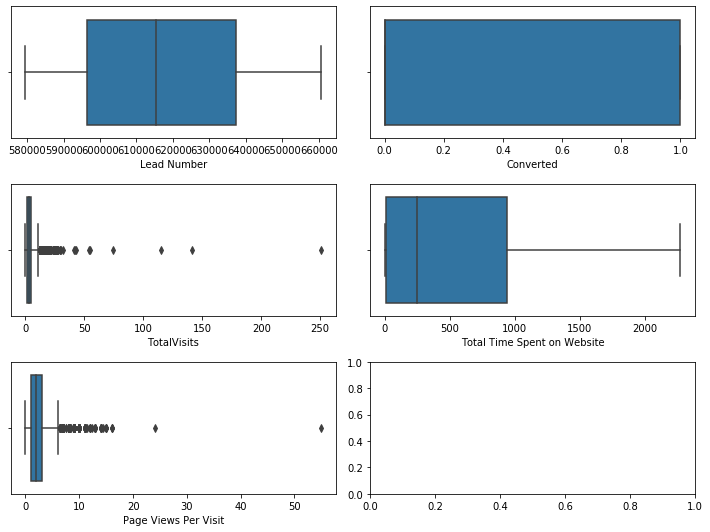

In [63]:
# Plotting boxplots on numberical variable columns

fig, axs = plt.subplots(3,2, figsize = (10,7.5))
plt1 = sns.boxplot(df['Lead Number'], ax = axs[0,0])
plt2 = sns.boxplot(df['Converted'], ax = axs[0,1])
plt3 = sns.boxplot(df['TotalVisits'], ax = axs[1,0])
plt4 = sns.boxplot(df['Total Time Spent on Website'], ax = axs[1,1])
plt5 = sns.boxplot(df['Page Views Per Visit'], ax = axs[2,0])
plt.tight_layout()

- We have observed that there are outliers for few variables (TotalVisits & Page Views Per Visit) 
- we will use capping technique to treat the outliers

#### Perform Outlier treatment

In [64]:
# Checking quantile %'s' for identified variables

df['TotalVisits'].quantile([0.25,0.50,0.75,0.90,0.99,1])

0.25      1.0
0.50      3.0
0.75      5.0
0.90      7.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [65]:
# Capping the outliers to 99% value for analysis

q4 = round(df['TotalVisits'].quantile(0.99))
print(q4)

df['TotalVisits'][df['TotalVisits']>= q4] = q4

17.0


In [66]:
# Checking quantile %'s' for identified variables

df['Page Views Per Visit'].quantile([0.25,0.50,0.75,0.90,0.99,1])

0.25     1.0
0.50     2.0
0.75     3.0
0.90     5.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

In [67]:
# Capping the outliers to 99% value for analysis

q4 = round(df['Page Views Per Visit'].quantile(0.99))
print(q4)

df['Page Views Per Visit'][df['Page Views Per Visit']>= q4] = q4

9.0


In [68]:
# Recheck after capping 

df['TotalVisits'].quantile([0.25,0.50,0.75,0.90,0.99,1])

0.25     1.0
0.50     3.0
0.75     5.0
0.90     7.0
0.99    17.0
1.00    17.0
Name: TotalVisits, dtype: float64

In [69]:
# Recheck after capping 

df['Page Views Per Visit'].quantile([0.25,0.50,0.75,0.90,0.99,1])

0.25    1.0
0.50    2.0
0.75    3.0
0.90    5.0
0.99    9.0
1.00    9.0
Name: Page Views Per Visit, dtype: float64

##### Now we would need to analyse the distribution of various values of all the above considered fields against the "Converted" value.

Intent is to check if the convertion is really dependent on the variable

#### Univariate Analysis 

Visualising Single/individual variable

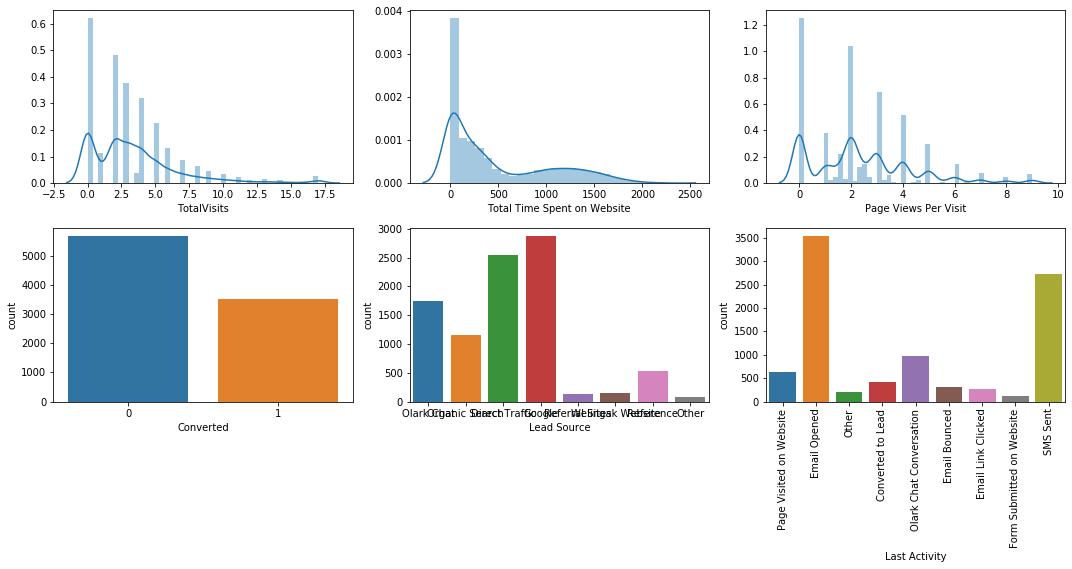

In [70]:
# Plotting dist/count plots on single/individual variable columns

fig, axs = plt.subplots(2,3, figsize = (15,8))
plt1 = sns.distplot(df['TotalVisits'], ax = axs[0,0])
plt2 = sns.distplot(df['Total Time Spent on Website'], ax = axs[0,1])
plt3 = sns.distplot(df['Page Views Per Visit'], ax = axs[0,2])
plt4 = sns.countplot(df['Converted'], ax = axs[1,0])
plt5 = sns.countplot(df['Lead Source'], ax = axs[1,1])
plt6 = sns.countplot(df['Last Activity'], ax = axs[1,2])
plt.xticks(rotation=90)
plt.tight_layout()

#### Inference :
- From above graghs we can see lot of variation in 'TotalVisits', 'Total Time Spent on Website'& 'Page Views Per Visit'
- Converted rate is low in comparision
- Lead Source - 'Google' and 'Direct Traffic' have higher count of leads
- Last Activity - 'Email Opened' ; 'SMS Sent' has high number of activities

### Bivariate Analysis

Visualizing multiple variables

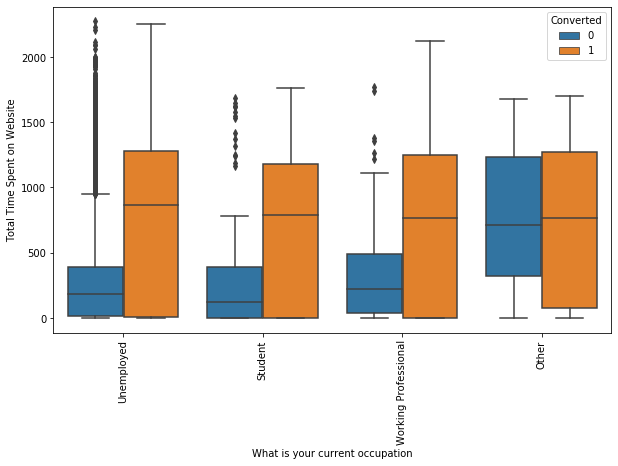

In [71]:
# Plotting boxplots on multiple variable columns
plt.figure(figsize=(10,6))
sns.boxplot('What is your current occupation','Total Time Spent on Website', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

- Above plot inferences - Total time spent on website is high in Unemployed cases

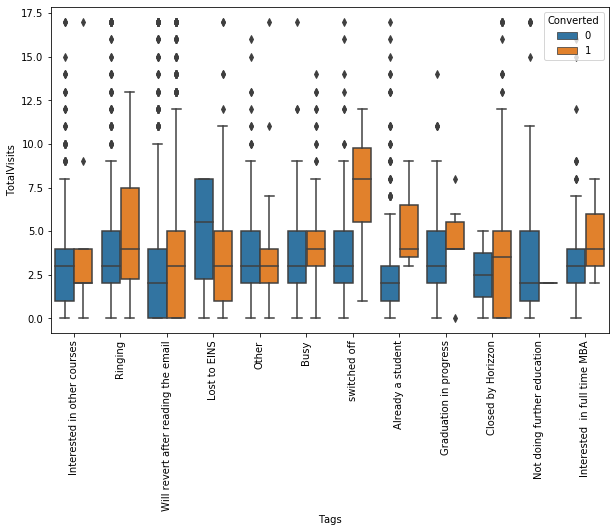

In [72]:
# Plotting boxplots on multiple variable columns
plt.figure(figsize=(10,6))
sns.boxplot('Tags','TotalVisits',hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

- Above plot inferences - Total Visits are high in Switched off and ringing cases

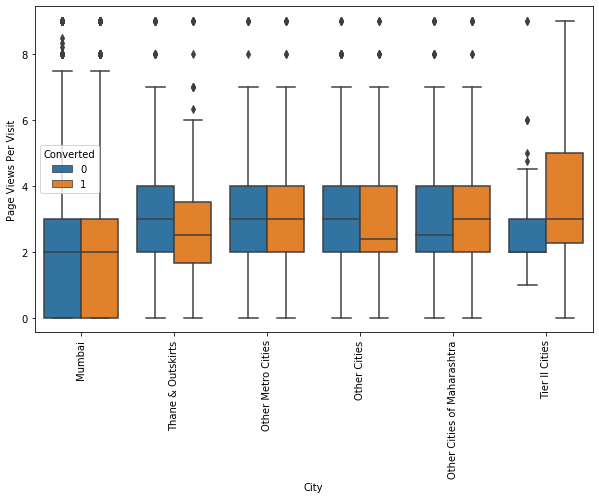

In [73]:
# Plotting boxplots on multiple variable columns
plt.figure(figsize=(10,6))
sns.boxplot('City','Page Views Per Visit',hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

- Above plot inferences - Page Views per Visit is high in Tier II Cities

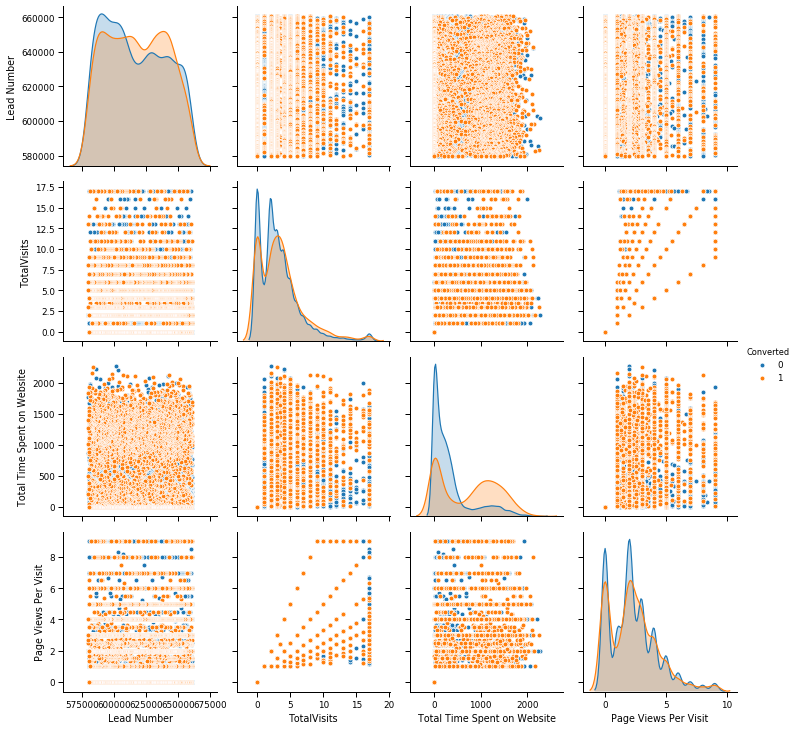

In [74]:
# Plotting Pairplot
sns.set_context("paper")
sns.pairplot(df,hue="Converted")

We could observe the relation of all numerice variables with each other as well as with our target variable.

In [75]:
# Converting below column into Numerical

df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [76]:
# Rechecking the dataframe

df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


### Data Preparation and Model Building
We shall follow below steps:

- Creating dummy variables
- Train and Test Split
- Feature Scaling
- Model Building
- Feature Selection Using RFE
- Assessing the Model with Stats Model(p-Values ; VIFs)
- probability cut off analysis using ROC curve
- Model Testing

#### Creating dummy variables

In [77]:
# Dropping the column'Lead Number' as it will not have any effect in predicting model

df.drop('Lead Number', axis=1, inplace=True)

In [78]:
# Creating a dummy variable for some of the categorical variables

dummies = ['Lead Origin', 'Lead Source','Last Activity','Specialization', 'What is your current occupation', 'Tags', 'City','Last Notable Activity']

In [79]:
# Dropping the first one and taking data in to status

status = pd.get_dummies(df[dummies], drop_first=True)

In [80]:
# Checking details of status dataframe

status.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [81]:
# Adding the results to the final dataframe

df_final = pd.concat([df,status], axis=1)

In [82]:
# Checking details of final dataframe

df_final.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [83]:
# Dropping the dummies variable as final dataframe is created

df_final.drop(dummies, axis=1, inplace=True)

In [84]:
# Rechecking details of final dataframe

df_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [85]:
# To view updated rows and columns in the final dataframe

df_final.shape

(9204, 66)

In [86]:
# Rechecking columns info of the dataframe

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 66 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9204 non-null   int64  
 1   TotalVisits                                           9204 non-null   float64
 2   Total Time Spent on Website                           9204 non-null   int64  
 3   Page Views Per Visit                                  9204 non-null   float64
 4   A free copy of Mastering The Interview                9204 non-null   int64  
 5   Lead Origin_Landing Page Submission                   9204 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9204 non-null   uint8  
 7   Lead Origin_Lead Import                               9204 non-null   uint8  
 8   Lead Source_Google                                    9204

#### Train and Test Split

The split was done at 70% and 30% for train and test data respectively

In [87]:
# Splitting the data into train and test

df_train, df_test = train_test_split(df_final , train_size=0.70, random_state=100)

In [88]:
# To view updated rows and columns in the Train dataframe

df_train.shape

(6442, 66)

In [89]:
# To view updated rows and columns in the Test dataframe

df_test.shape

(2762, 66)

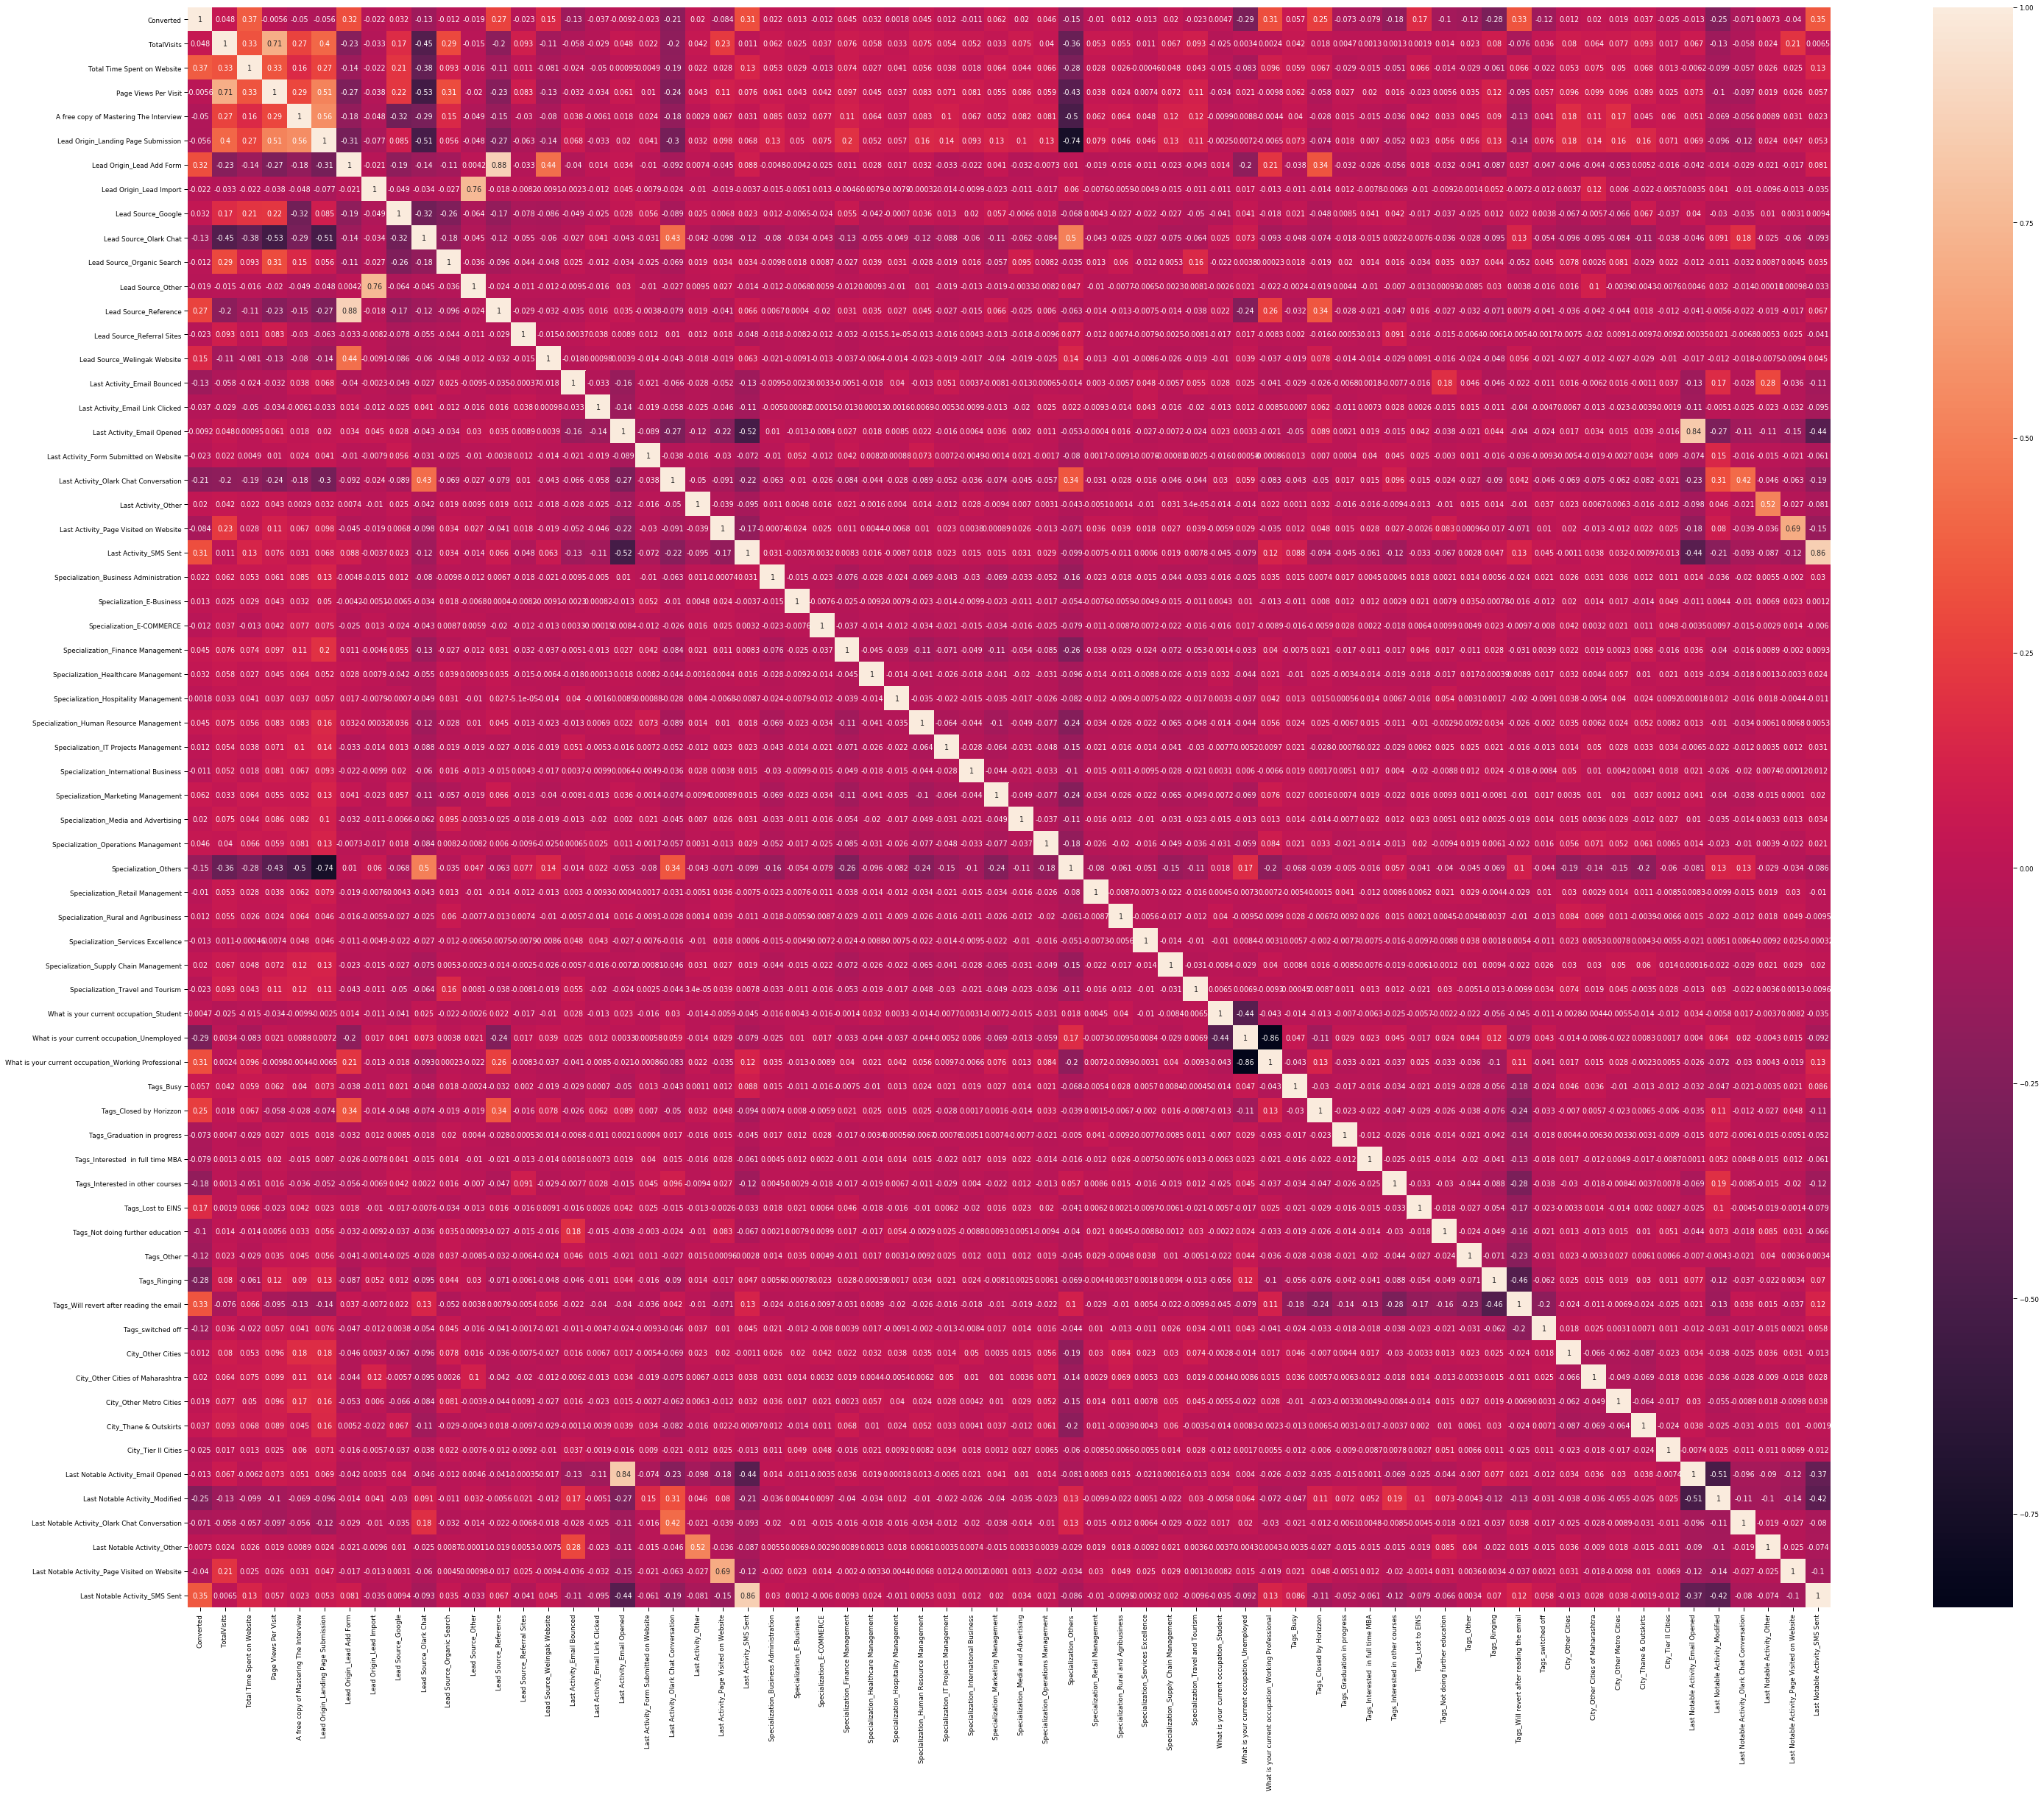

In [90]:
# To check the correlation among varibles using heatmap

corr = df_train.corr()
plt.figure(figsize=(50,40))
sns.heatmap(corr, annot=True)
plt.show()

Since the number of variables are pretty high, it's better that we look at the Correlation table instead of plotting a heatmap

In [91]:
# Reshaping correlation matrix by unstack and reset index

corr.unstack().reset_index()

,level_0,level_1,0
0,Converted,Converted,1.000000
1,Converted,TotalVisits,0.048058
2,Converted,Total Time Spent on Website,0.365424
3,Converted,Page Views Per Visit,-0.005648
4,Converted,A free copy of Mastering The Interview,-0.050033
...,...,...,...
4351,Last Notable Activity_SMS Sent,Last Notable Activity_Modified,-0.419843
4352,Last Notable Activity_SMS Sent,Last Notable Activity_Olark Chat Conversation,-0.079614
4353,Last Notable Activity_SMS Sent,Last Notable Activity_Other,-0.074460
4354,Last Notable Activity_SMS Sent,Last Notable Activity_Page Visited on Website,-0.102834


In [92]:
# To extract highly correlated features 

corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

In [93]:
# Checking correlation for 'var1','var2','correlation'

corr = corr.unstack().reset_index()
corr.columns = ['var1','var2','correlation']

In [94]:
# Sorting correlation to check top 5 correlated variables

corr.sort_values(by= 'correlation' , ascending=False).head()

,var1,var2,correlation
798,Lead Source_Reference,Lead Origin_Lead Add Form,0.875042
4312,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.855491
3977,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.838834
733,Lead Source_Other,Lead Origin_Lead Import,0.759460
199,Page Views Per Visit,TotalVisits,0.708054


#### Feature Scaling

In [95]:
# Reviewing details for Train dataframe

df_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5310,0,4.0,101,4.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2181,0,8.0,262,8.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8215,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
8887,0,2.0,230,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
7920,0,4.0,197,4.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [96]:
# This provides summary about numeric columns for Train dataframe

df_train.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000
mean,0.394598,3.389398,497.828159,2.362100,0.311549,0.533685,0.076063,0.005123,0.314654,0.186122,0.127445,0.008848,0.059298,0.013039,0.015678,0.036324,0.028407,0.390717,0.012108,0.103539,0.020801,0.067526,0.296026,0.044241,0.005123,0.011021,0.110835,0.016299,0.011953,0.092207,0.038808,0.018783,0.093294,0.022664,0.054797,0.358740,0.011177,0.006675,0.004657,0.039894,0.022353,0.021577,0.895840,0.079013,0.021267,0.038963,0.012419,0.011798,0.051537,0.019714,0.016299,0.033840,0.124806,0.594536,0.026234,0.076995,0.049674,0.043465,0.082738,0.006364,0.310928,0.364173,0.020180,0.017696,0.033219,0.235331
std,0.488802,3.252707,549.740758,1.983489,0.463163,0.498903,0.265120,0.071395,0.464414,0.389236,0.333497,0.093655,0.236201,0.113452,0.124237,0.187110,0.166146,0.487949,0.109377,0.304686,0.142729,0.250950,0.456538,0.205646,0.071395,0.104411,0.313952,0.126634,0.108682,0.289341,0.193152,0.135768,0.290867,0.148841,0.227601,0.479668,0.105135,0.081434,0.068088,0.195726,0.147841,0.145310,0.305492,0.269780,0.144283,0.193522,0.110753,0.107982,0.221107,0.139028,0.126634,0.180832,0.330524,0.491020,0.159843,0.266604,0.217287,0.203917,0.275508,0.079530,0.462909,0.481235,0.140627,0.131856,0.179223,0.424238
min,0.000000,0.000000,0.000000,

In [97]:
# Scale the three numeric features present in the dataset

scalled = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = MinMaxScaler()
df_train[scalled] = scaler.fit_transform(df_train[scalled])

In [98]:
# Recheck summary of Train dataframe

df_train.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000
mean,0.394598,0.199376,0.219115,0.262456,0.311549,0.533685,0.076063,0.005123,0.314654,0.186122,0.127445,0.008848,0.059298,0.013039,0.015678,0.036324,0.028407,0.390717,0.012108,0.103539,0.020801,0.067526,0.296026,0.044241,0.005123,0.011021,0.110835,0.016299,0.011953,0.092207,0.038808,0.018783,0.093294,0.022664,0.054797,0.358740,0.011177,0.006675,0.004657,0.039894,0.022353,0.021577,0.895840,0.079013,0.021267,0.038963,0.012419,0.011798,0.051537,0.019714,0.016299,0.033840,0.124806,0.594536,0.026234,0.076995,0.049674,0.043465,0.082738,0.006364,0.310928,0.364173,0.020180,0.017696,0.033219,0.235331
std,0.488802,0.191336,0.241963,0.220388,0.463163,0.498903,0.265120,0.071395,0.464414,0.389236,0.333497,0.093655,0.236201,0.113452,0.124237,0.187110,0.166146,0.487949,0.109377,0.304686,0.142729,0.250950,0.456538,0.205646,0.071395,0.104411,0.313952,0.126634,0.108682,0.289341,0.193152,0.135768,0.290867,0.148841,0.227601,0.479668,0.105135,0.081434,0.068088,0.195726,0.147841,0.145310,0.305492,0.269780,0.144283,0.193522,0.110753,0.107982,0.221107,0.139028,0.126634,0.180832,0.330524,0.491020,0.159843,0.266604,0.217287,0.203917,0.275508,0.079530,0.462909,0.481235,0.140627,0.131856,0.179223,0.424238
min,0.000000,0.000000,0.000000,0.00

In [99]:
# Checking for Converted % from train dataframe

sum(df_train['Converted']/len(df_train))

0.39459795094692957

### Model Building

In [100]:
# Reviewing details for Train dataframe

df_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5310,0,0.235294,0.044454,0.444444,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2181,0,0.470588,0.115317,0.888889,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8215,0,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
8887,0,0.117647,0.101232,0.222222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
7920,0,0.235294,0.086708,0.444444,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [101]:
# Popped converted column from train and returning data into y_train

y_train = df_train.pop('Converted')

# Returning train datafram in to x_train

x_train = df_train

In [102]:
# Reviewing details for x_train dataframe

x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5310,0.235294,0.044454,0.444444,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2181,0.470588,0.115317,0.888889,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8215,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
8887,0.117647,0.101232,0.222222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
7920,0.235294,0.086708,0.444444,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [103]:
# Reviewing details for y_train dataframe

y_train.head()

5310    0
2181    0
8215    0
8887    0
7920    0
Name: Converted, dtype: int64

In [104]:
#  Fit a logistic Regression model on x_train after adding a constant and output the summary

x_train_lr = sm.add_constant(x_train)
logm1 = sm.GLM(y_train, x_train_lr,family=sm.families.Binomial())
logm1= logm1.fit()
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6376
Model Family:                Binomial   Df Model:                           65
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1662.8
Date:                Mon, 07 Sep 2020   Deviance:                       3325.5
Time:                        18:42:54   Pearson chi2:                 1.49e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

There are quite a few variables which have a p-value greater than 0.05. We will need to take care of them.

#### Feature Selection Using RFE

Recursive Feature Elimination (RFE) to perform Variable Selection

In [105]:
# Import 'LogisticRegression'

logreg = LogisticRegression()

In [106]:
# Running RFE with 20 variables as output

rfe = RFE(logreg, 20)
rfe = rfe.fit(x_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True  True False False False False False False
 False  True  True False False False  True False False False False False
 False False False False False False False False False False  True False
 False False False False False  True  True  True  True False False  True
  True  True False  True  True  True False False False False False False
  True False False  True  True]
[ 5  1  8 18  1  1 21 43  4 26 32 28 23  1  1 38 16 31  1  9 39 13 40 22
 45 44 20 10 41 35 12 46 34 33  1 17 24 42 37 14 11  1  1  1  1  7  2  1
  1  1  3  1  1  1 29 36 19 30 25 27  1  6 15  1  1]


In [107]:
# Features that have been selected by RFE

list(zip(x_train.columns , rfe.support_,rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('A free copy of Mastering The Interview', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Source_Google', False, 43),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Other', False, 32),
 ('Lead Source_Reference', False, 28),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 38),
 ('Last Activity_Email Opened', False, 16),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', False, 9),
 ('Last Activity_Page Visited on Website', False, 39),
 ('Last Activity_SMS Sent', False, 13),
 ('Specialization_Business Administration', 

In [108]:
# Returning all columns selected by RFE into 'cols' variable

cols = x_train.columns[rfe.support_]

In [109]:
# Selecting columns selected by RFE

x_train = x_train[cols]

In [110]:
# Rechecking details of x_train dataframe

x_train.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5310,0.044454,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2181,0.115317,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
8215,0.000000,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0
8887,0.101232,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
7920,0.086708,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


All the variables selected by RFE, next statistics part (p-values and the VIFs)

#### Assessing the model with StatsModels

In [111]:
#  Rechecking logistic Regression model for p-values

x_train_lr = sm.add_constant(x_train)
logm_rfm = sm.GLM(y_train, x_train_lr,family=sm.families.Binomial())
logm_rfm = logm_rfm.fit()
print(logm_rfm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1711.9
Date:                Mon, 07 Sep 2020   Deviance:                       3423.8
Time:                        18:42:57   Pearson chi2:                 1.23e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### VIF

Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression

In [112]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['vars'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif.sort_values(by='VIF', ascending=False)

,vars,VIF
7,What is your current occupation_Unemployed,14.555034
15,Tags_Will revert after reading the email,6.613062
1,Lead Origin_Landing Page Submission,5.460936
6,Specialization_Others,3.924065
17,Last Notable Activity_Modified,2.286804
8,What is your current occupation_Working Profes...,2.248977
14,Tags_Ringing,2.223206
0,Total Time Spent on Website,2.162898
2,Lead Origin_Lead Add Form,1.959886
19,Last Notable Activity_SMS Sent,1.757316


##### As we can notice some of the variables have high VIF values >5 as well as high p-values. Such variables are insignificant and should be dropped.

In [113]:
# Dropping column 'Tags_Not doing further education' which has high p-value

x_train = x_train.drop('Tags_Not doing further education', axis=1)

In [114]:
# Rechecking shape of train dataframe

x_train.shape

(6442, 19)

In [115]:
# Model 2 (Refit the model with the new set of features)

x_train_lr = sm.add_constant(x_train)
logm2 = sm.GLM(y_train, x_train_lr,family=sm.families.Binomial())
logm2 = logm2.fit()
print(logm2.summary())

# VIF

vif = pd.DataFrame()
vif['vars'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
print(vif.sort_values(by='VIF', ascending=False))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6422
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1712.6
Date:                Mon, 07 Sep 2020   Deviance:                       3425.3
Time:                        18:42:58   Pearson chi2:                 1.21e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [116]:
# Dropping below column which has next high p-value 

x_train.drop('Tags_Interested in other courses', axis=1, inplace= True)

In [117]:
# Model 3 (Refit the model with the new set of features)

x_train_lr = sm.add_constant(x_train)
logm3 = sm.GLM(y_train, x_train_lr,family=sm.families.Binomial())
logm3 = logm3.fit()
print(logm3.summary())

# VIF

vif = pd.DataFrame()
vif['vars'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
print(vif.sort_values(by='VIF', ascending=False))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6423
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1713.2
Date:                Mon, 07 Sep 2020   Deviance:                       3426.5
Time:                        18:42:59   Pearson chi2:                 1.22e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [118]:
# Dropping below column which has high VIF Value

x_train.drop('What is your current occupation_Unemployed', axis=1, inplace=True)

In [119]:
# Model 4 (Refit the model with the new set of features)

x_train_lr = sm.add_constant(x_train)
logm4 = sm.GLM(y_train, x_train_lr,family=sm.families.Binomial())
logm4 = logm4.fit()
print(logm4.summary())

# VIF

vif = pd.DataFrame()
vif['vars'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
print(vif.sort_values(by='VIF', ascending=False))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6424
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1725.4
Date:                Mon, 07 Sep 2020   Deviance:                       3450.8
Time:                        18:43:00   Pearson chi2:                 1.20e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [120]:
# Dropping below column which still has a p-value - 0.016

x_train.drop('Tags_switched off',axis=1, inplace=True)

In [121]:
# Model 5 (Refit the model with the new set of features)

x_train_lr = sm.add_constant(x_train)
logm5 = sm.GLM(y_train, x_train_lr,family=sm.families.Binomial())
logm5 = logm5.fit()
print(logm5.summary())

# VIF

vif = pd.DataFrame()
vif['vars'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
print(vif.sort_values(by='VIF', ascending=False))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6425
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1729.2
Date:                Mon, 07 Sep 2020   Deviance:                       3458.3
Time:                        18:43:00   Pearson chi2:                 1.10e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [122]:
# Dropping below column which still has a p-value - 0.005

x_train.drop('Tags_Ringing', axis=1, inplace=True)

In [123]:
# Model 6 (Refit the model with the new set of features)

x_train_lr = sm.add_constant(x_train)
logm6 = sm.GLM(y_train, x_train_lr,family=sm.families.Binomial())
logm6 = logm6.fit()
print(logm6.summary())

# VIF

vif = pd.DataFrame()
vif['vars'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
print(vif.sort_values(by='VIF', ascending=False))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1733.2
Date:                Mon, 07 Sep 2020   Deviance:                       3466.4
Time:                        18:43:01   Pearson chi2:                 1.06e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### All the VIFs & p-values are now in the appropriate range. We are good to go with further predictions

#### Prediction

In [124]:
# Getting the predicted probabilities on the train set

y_train_pred = logm6.predict(x_train_lr)

In [125]:
# Checking the details of y_train_pred

y_train_pred.head()

5310    0.033663
2181    0.006498
8215    0.034536
8887    0.778241
7920    0.278894
dtype: float64

#### Coverted flag and predicted probabilities together

In [126]:
#Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted': y_train, 'Converted_prob': y_train_pred })

In [127]:
# Let's see the head

y_train_pred_final.head()

,Converted,Converted_prob
5310,0,0.033663
2181,0,0.006498
8215,0,0.034536
8887,0,0.778241
7920,0,0.278894


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [128]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [129]:
# Let's see the head

y_train_pred_final.head()

,Converted,Converted_prob,Predicted
5310,0,0.033663,0
2181,0,0.006498,0
8215,0,0.034536,0
8887,0,0.778241,1
7920,0,0.278894,0


##### Now that you have the probabilities and have also made converted predictions using them, it's time to evaluate the model.

In [130]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'] )
print(confusion)

[[3624  276]
 [ 364 2178]]


In [131]:
# Predicted     not_lead    lead
# Actual
# not_lead        3624      276
# lead            364       2178

In [132]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted']))

0.9006519714374418


##### That's around 90%accuracy which is a very good value

#### Plotting the ROC Curve

Receiver Operating Characteristic (ROC) - An ROC curve demonstrates following things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [133]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'], drop_intermediate = False )

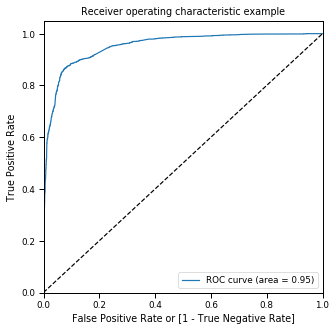

In [135]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

- The area under the curve of the ROC is 0.89 which is quite good.
- Model seems to be accurate. 
- Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

#### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [136]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5310,0,0.033663,0,1,0,0,0,0,0,0,0,0,0
2181,0,0.006498,0,1,0,0,0,0,0,0,0,0,0
8215,0,0.034536,0,1,0,0,0,0,0,0,0,0,0
8887,0,0.778241,1,1,1,1,1,1,1,1,1,0,0
7920,0,0.278894,0,1,1,1,0,0,0,0,0,0,0


In [137]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positives 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.394598  1.000000  0.000000
0.1   0.1  0.778019  0.973643  0.650513
0.2   0.2  0.828004  0.953973  0.745897
0.3   0.3  0.875349  0.902439  0.857692
0.4   0.4  0.895374  0.876869  0.907436
0.5   0.5  0.900652  0.856806  0.929231
0.6   0.6  0.893356  0.814319  0.944872
0.7   0.7  0.865259  0.718725  0.960769
0.8   0.8  0.843061  0.634540  0.978974
0.9   0.9  0.820397  0.562549  0.988462


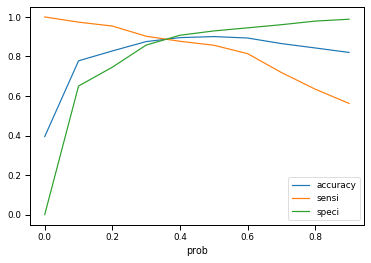

In [138]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [139]:
# Let us make the final prediction using 0.35 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_prob'].map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
5310,0,0.033663,0,1,0,0,0,0,0,0,0,0,0,0
2181,0,0.006498,0,1,0,0,0,0,0,0,0,0,0,0
8215,0,0.034536,0,1,0,0,0,0,0,0,0,0,0,0
8887,0,0.778241,1,1,1,1,1,1,1,1,1,0,0,1
7920,0,0.278894,0,1,1,1,0,0,0,0,0,0,0,0


In [140]:
# Let's create the confusion matrix once again

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'] )
print(confusion)

[[3466  434]
 [ 283 2259]]


In [141]:
# Let's check the accuracy now

print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))

0.888699161751009


In [142]:
# Let's evaluate the other metrics as well

# [ TN  FP ]
# [ FN  TP ]

TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP = confusion[1,1] # true positive 

#### Sensitivity

In [143]:
# Let's see the sensitivity of our logistic regression model

print("Sensitivity is " , TP / float(TP+FN))

Sensitivity is  0.8886703383162864


#### Specificity

In [144]:
# Let us calculate specificity

print(" Specificity is " , TN / float(TN+FP))

 Specificity is  0.8887179487179487


In [145]:
# Positive predictive value 

print (" Positive predictive value is " , TP / float(TP+FP))

 Positive predictive value is  0.8388414407723728


In [146]:
# Negative predictive value

print (" Negative predictive value is ", TN / float(TN+ FN))

 Negative predictive value is  0.9245132035209389


#### Precision and Recall

In [147]:
# Precision and recall

# Precission (Positive Prediction)
print ("Precision (Positive Prediction) : ", TP / float(TP+FP))

# recall(sensitivity)

print("Recall(sensitivity) : ",TP / float(TP+FN))

Precision (Positive Prediction) :  0.8388414407723728
Recall(sensitivity) :  0.8886703383162864


#### Precision and Recall tradeoff

In [148]:
y_train_pred_final['Converted'], y_train_pred_final['Converted_prob']

(5310    0
 2181    0
 8215    0
 8887    0
 7920    0
        ..
 350     1
 79      1
 8070    1
 6963    0
 5664    0
 Name: Converted, Length: 6442, dtype: int64,
 5310    0.033663
 2181    0.006498
 8215    0.034536
 8887    0.778241
 7920    0.278894
           ...   
 350     0.902831
 79      0.993603
 8070    0.998802
 6963    0.029490
 5664    0.381417
 Name: Converted_prob, Length: 6442, dtype: float64)

In [149]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

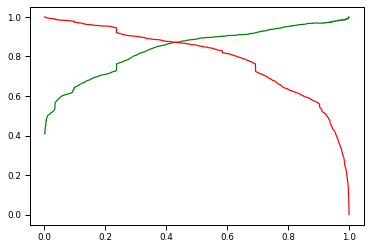

In [150]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The precision and recall tradeoff suggested a cutoff of 0.4 which is very close to our optimum point to take it as a cutoff probability.

### Model Testing
Making predictions on the test set

In [151]:
# Checking details of test dataframe

df_test.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2400,1,4.0,963,4.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
849,0,12.0,68,3.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
7459,0,2.0,133,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
6184,1,3.0,531,3.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4869,1,2.0,1321,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [152]:
# Scale the test set as well using 'transform'

scalled = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
df_test[scalled] = scaler.transform(df_test[scalled])

In [153]:
# Popped converted column and moved into y_test

y_test = df_test.pop('Converted')
x_test = df_test

In [154]:
# Printing shape of y_test & x_test

print(y_test.shape)
print(x_test.shape)

(2762,)
(2762, 65)


In [155]:
# Checking columns in x_train dataframe

x_train.columns

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Specialization_Others',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [156]:
#  Getting x_train columns into x_test

x_test = x_test[x_train.columns]

In [157]:
# Checking details of x_test dataframe

x_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2400,0.423856,1,0,0,0,0,0,0,0,0,0,1,0,0,1
849,0.029930,0,0,0,0,1,0,0,0,0,0,1,1,0,0
7459,0.058539,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6184,0.233715,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4869,0.581426,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [158]:
# Adding constant to x_test with selected features

x_test_sm = sm.add_constant(x_test)

In [159]:
# Make prediction on test set

y_test_pred = logm6.predict(x_test_sm)

In [160]:
# Add converted, converted_test_probability column

y_test_pred_final = pd.DataFrame({'Converted': y_test, 'Converted_prob': y_test_pred })

In [161]:
# Final prediction on test

y_test_pred_final = y_test_pred_final.reset_index()

In [162]:
# Checking details of final model

y_test_pred_final.head()

,index,Converted,Converted_prob
0,2400,1,0.924793
1,849,0,0.155950
2,7459,0,0.005075
3,6184,1,0.003807
4,4869,1,0.976565


In [163]:
# Final prediction using 0.35 as the cut off

y_test_pred_final['final_predicted'] = y_test_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.35 else 0)

In [164]:
# Checking details of final model

y_test_pred_final.head()

,index,Converted,Converted_prob,final_predicted
0,2400,1,0.924793,1
1,849,0,0.155950,0
2,7459,0,0.005075,0
3,6184,1,0.003807,0
4,4869,1,0.976565,1


In [165]:
# Let's check the overall accuracy now

metrics.accuracy_score(y_test_pred_final['Converted'] , y_test_pred_final['final_predicted'])

0.8924692251991311

In [166]:
# Let's create the confusion matrix once again

confusion_test = metrics.confusion_matrix(y_test_pred_final['Converted'] , y_test_pred_final['final_predicted'] )
confusion_test

array([[1585,  187],
       [ 110,  880]], dtype=int64)

In [167]:
# metric

# [ TN  FP ]
# [ FN  TP ]

TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives
TP = confusion_test[1,1] # true positive 

In [168]:
# Let's see the sensitivity of our logistic regression test model

print("Sensitivity is " , TP / float(TP+FN))

# Let us calculate specificity

print("Specificity is " , TN / float(TN+FP))

# Positive predictive value 

print ("Positive predictive value is " , TP / float(TP+FP))

# Negative predictive value

print ("Negative predictive value is ", TN / float(TN+ FN))

# Precision and recall

# Precission (Positive Prediction)
print ("Precision (Positive Prediction) : ", TP / float(TP+FP))

# recall(sensitivity)

print("Recall(sensitivity) : ",TP / float(TP+FN))

Sensitivity is  0.8888888888888888
Specificity is  0.8944695259593679
Positive predictive value is  0.8247422680412371
Negative predictive value is  0.9351032448377581
Precision (Positive Prediction) :  0.8247422680412371
Recall(sensitivity) :  0.8888888888888888


In [169]:
# Assigning lead score for test set 

y_test_pred_final['Lead_Score'] = y_test_pred_final['final_predicted']*100

y_test_pred_final.sort_values(by = 'Lead_Score',ascending = False).head()

,index,Converted,Converted_prob,final_predicted,Lead_Score
0,2400,1,0.924793,1,100
1435,4833,1,0.947683,1,100
1460,4629,1,0.893202,1,100
1459,2514,1,0.998266,1,100
1458,2681,1,0.998802,1,100


## Recommendations

Since the model has resulted high accuracy results in predicting the leads who can be converted.
So the marketing team can leverage this to make their operations more efficient by reducing the number
customer interactions there by improving the conversions as well.

- The top three variables that contribute towards the probability of a lead getting converted are: <BR>
 	- Leads who tag with Lost to EINS <BR>
 	- Leads tag with Closed by Horizon<BR>
 	- Total Time Spent on Website<BR>

- Phone calls should be done for the following people:<BR>
    - They spend a lot of time in the website and this can be done by making the website interesting and thus bringing them back to the site
    - They are seen coming back to the website repeatedly
    - Their last activity is through SMS or through Olark chat conversation
    - They are working professionals <BR>
